In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"ninadgund","key":"141767163ebec4db86aad118a0625f26"}'}

In [ ]:
#install Kaggle
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-10 18:11:20          15384  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9370  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4181  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3421  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
!kaggle competitions download -c dog-breed-identification

005b6c6c76fefd6b458ef6fb6e54da6e.jpg: Skipping, found more recently modified local copy (use --force to force download)
0042d6bf3e5f3700865886db32689436.jpg: Skipping, found more recently modified local copy (use --force to force download)
001a5f3114548acdefa3d4da05474c2e.jpg: Skipping, found more recently modified local copy (use --force to force download)
0041940322116ae58c38130f5a6f71f9.jpg: Skipping, found more recently modified local copy (use --force to force download)
00496f65de6cc319145ce97bd6e90360.jpg: Skipping, found more recently modified local copy (use --force to force download)
0012a730dfa437f5f3613fb75efcd4ce.jpg: Skipping, found more recently modified local copy (use --force to force download)
005b281f1a4d6f29d527c9585e9bd33c.jpg: Skipping, found more recently modified local copy (use --force to force download)
004bf14426d1a830d459a9e0c0721309.jpg: Skipping, found more recently modified local copy (use --force to force download)
004476c96f575879af4af471af65cae8.jpg: Sk

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

import torch
import torch.nn as nn
from torch import optim

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.inf)

In [ ]:
label_csv = pd.read_csv("./labels.csv")


In [ ]:
label_csv["path"] = './train/'+label_csv["id"]+".jpg"

In [ ]:
label_csv.head()

,id,breed,path
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,./train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,./train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,./train/001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,./train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,./train/0021f9ceb3235effd7fcde7f7538ed62.jpg


In [ ]:
#Checking number of dog breeds
label_csv["breed"].nunique()

120

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(label_csv["path"], label_csv["breed"], random_state=0)

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
clf_mf = DummyClassifier(strategy='most_frequent', random_state=0)
clf_mf.fit(X_train, y_train)
clf_mf.score(X_test, y_test)

0.008998435054773083

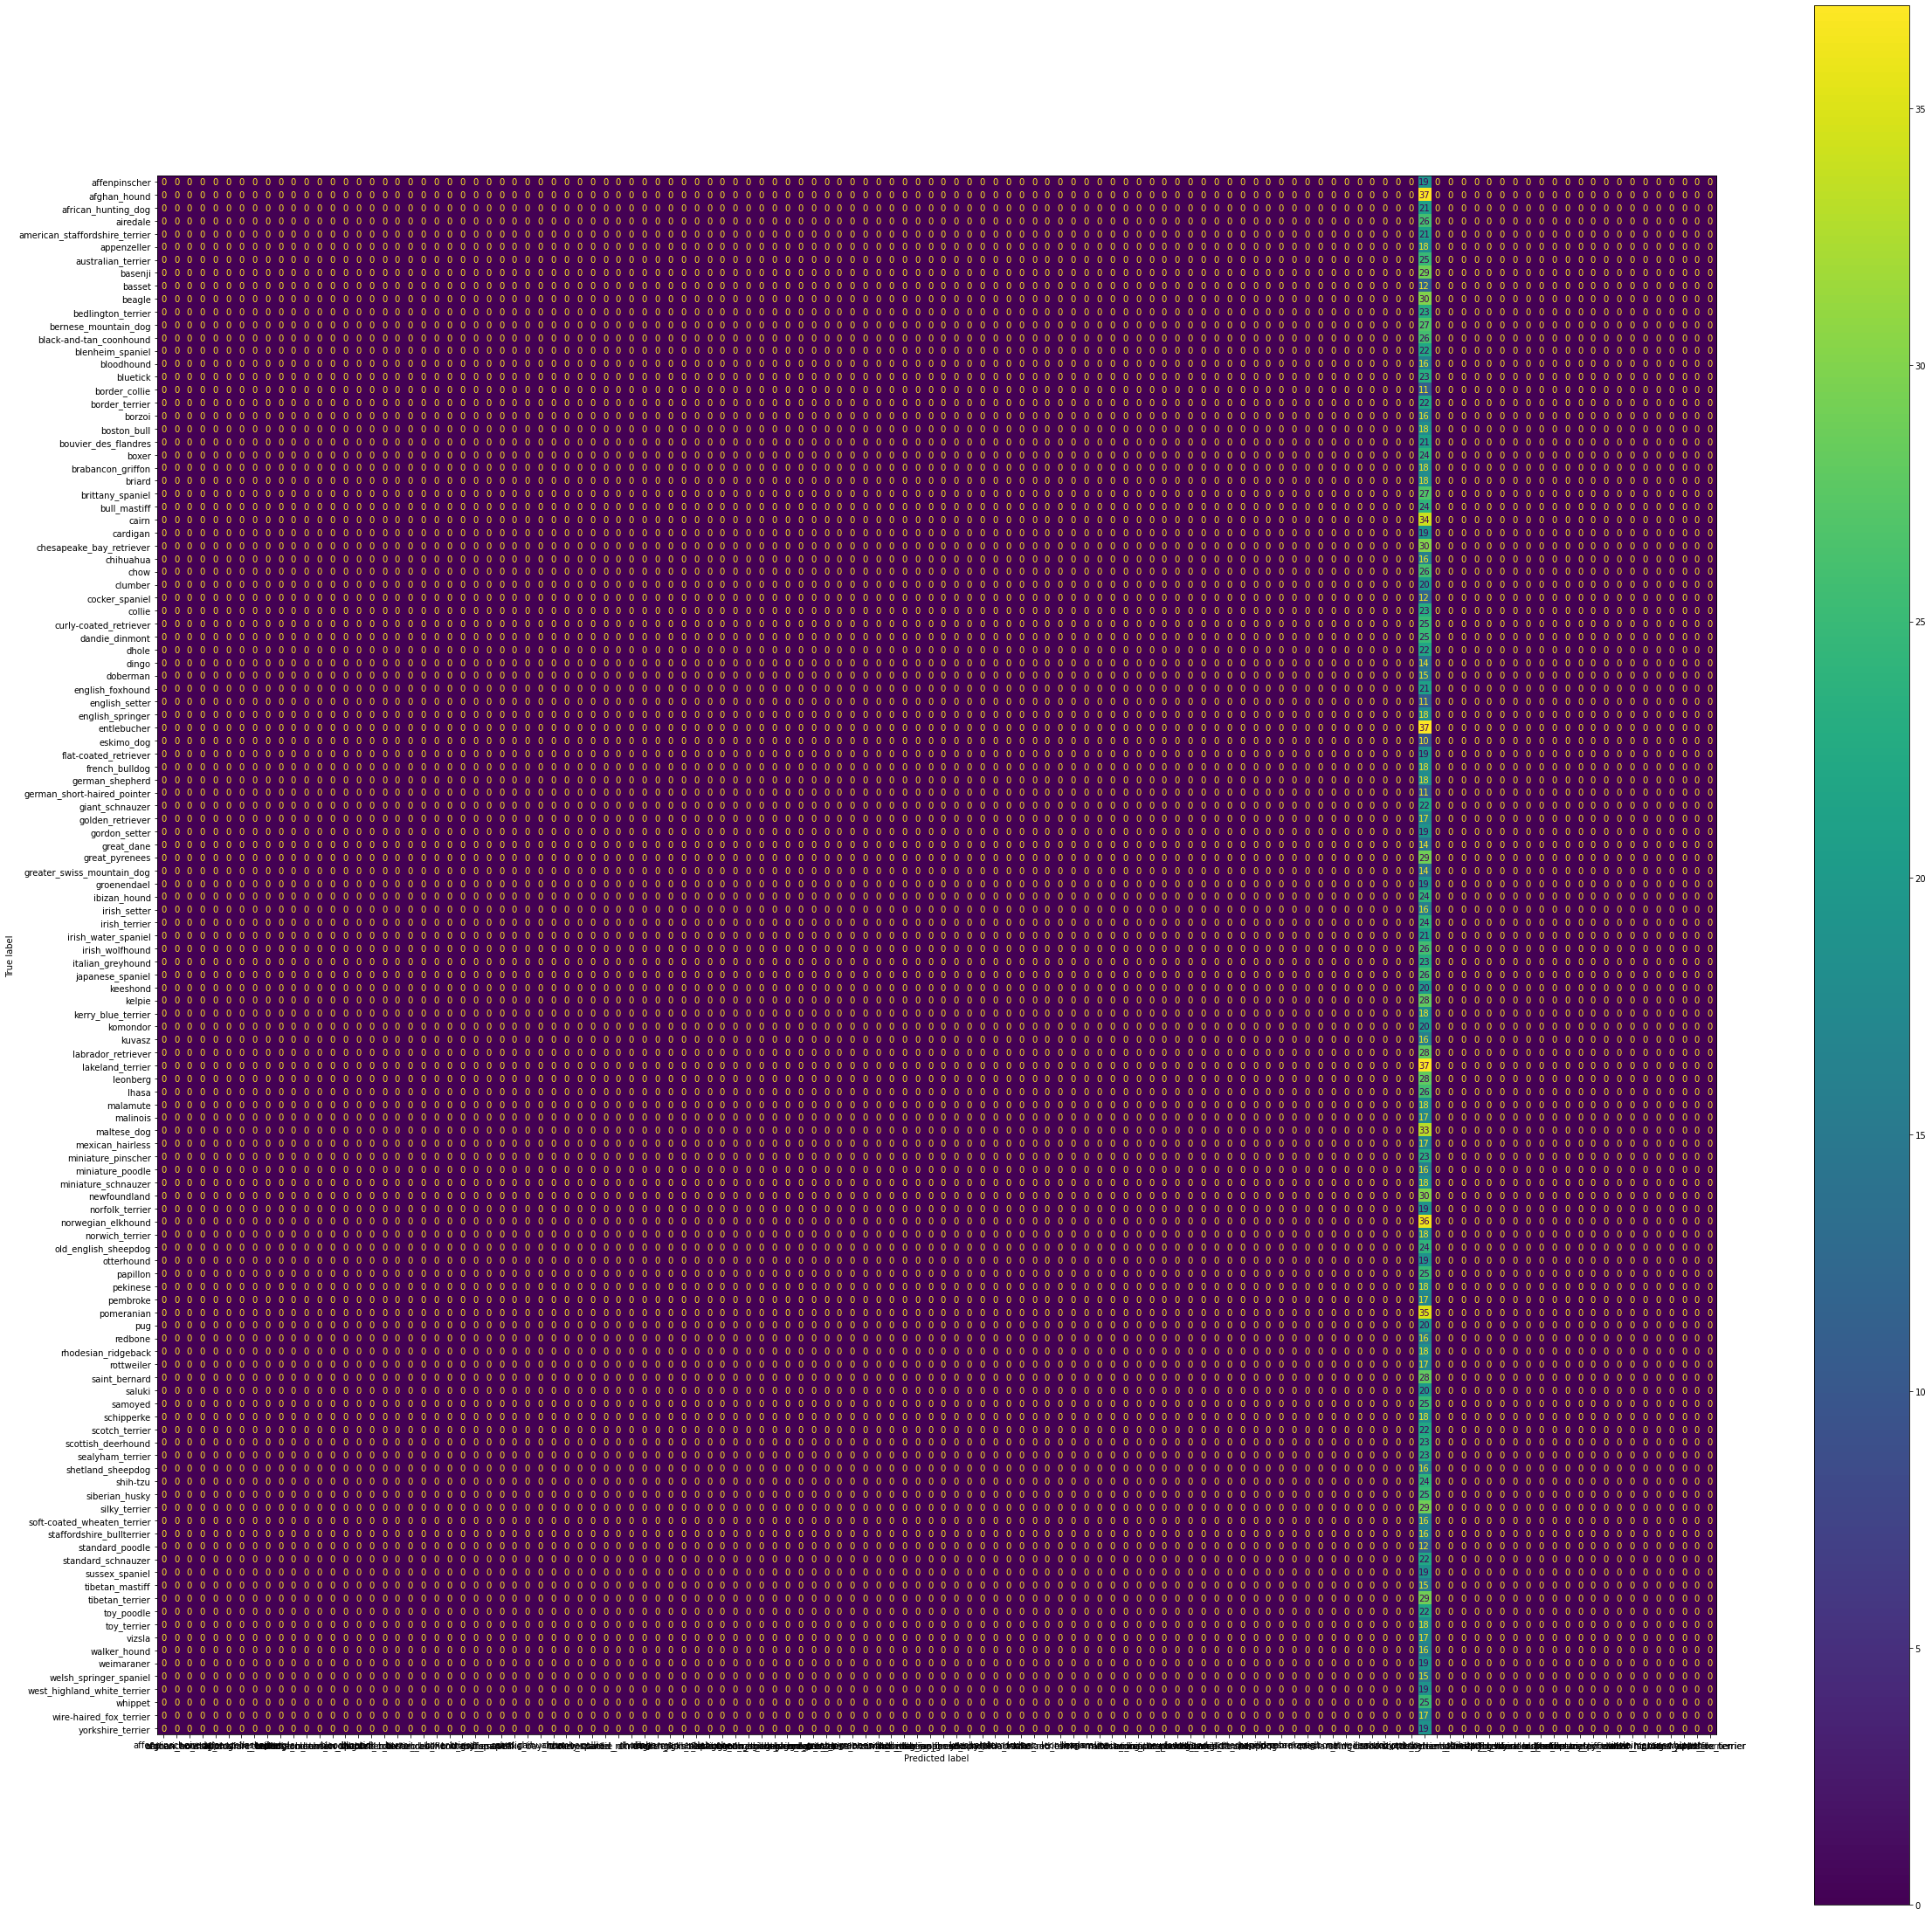

In [ ]:
predictions= clf_mf.predict(X_test)
conf_mtx = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(conf_mtx, display_labels=clf_mf.classes_)

fig, ax = plt.subplots(figsize=(40, 40))
disp.plot(ax=ax)

In [ ]:
clf_str = DummyClassifier(strategy='stratified', random_state=0)
clf_str.fit(X_train, y_train)
clf_str.score(X_test, y_test)

0.007433489827856025

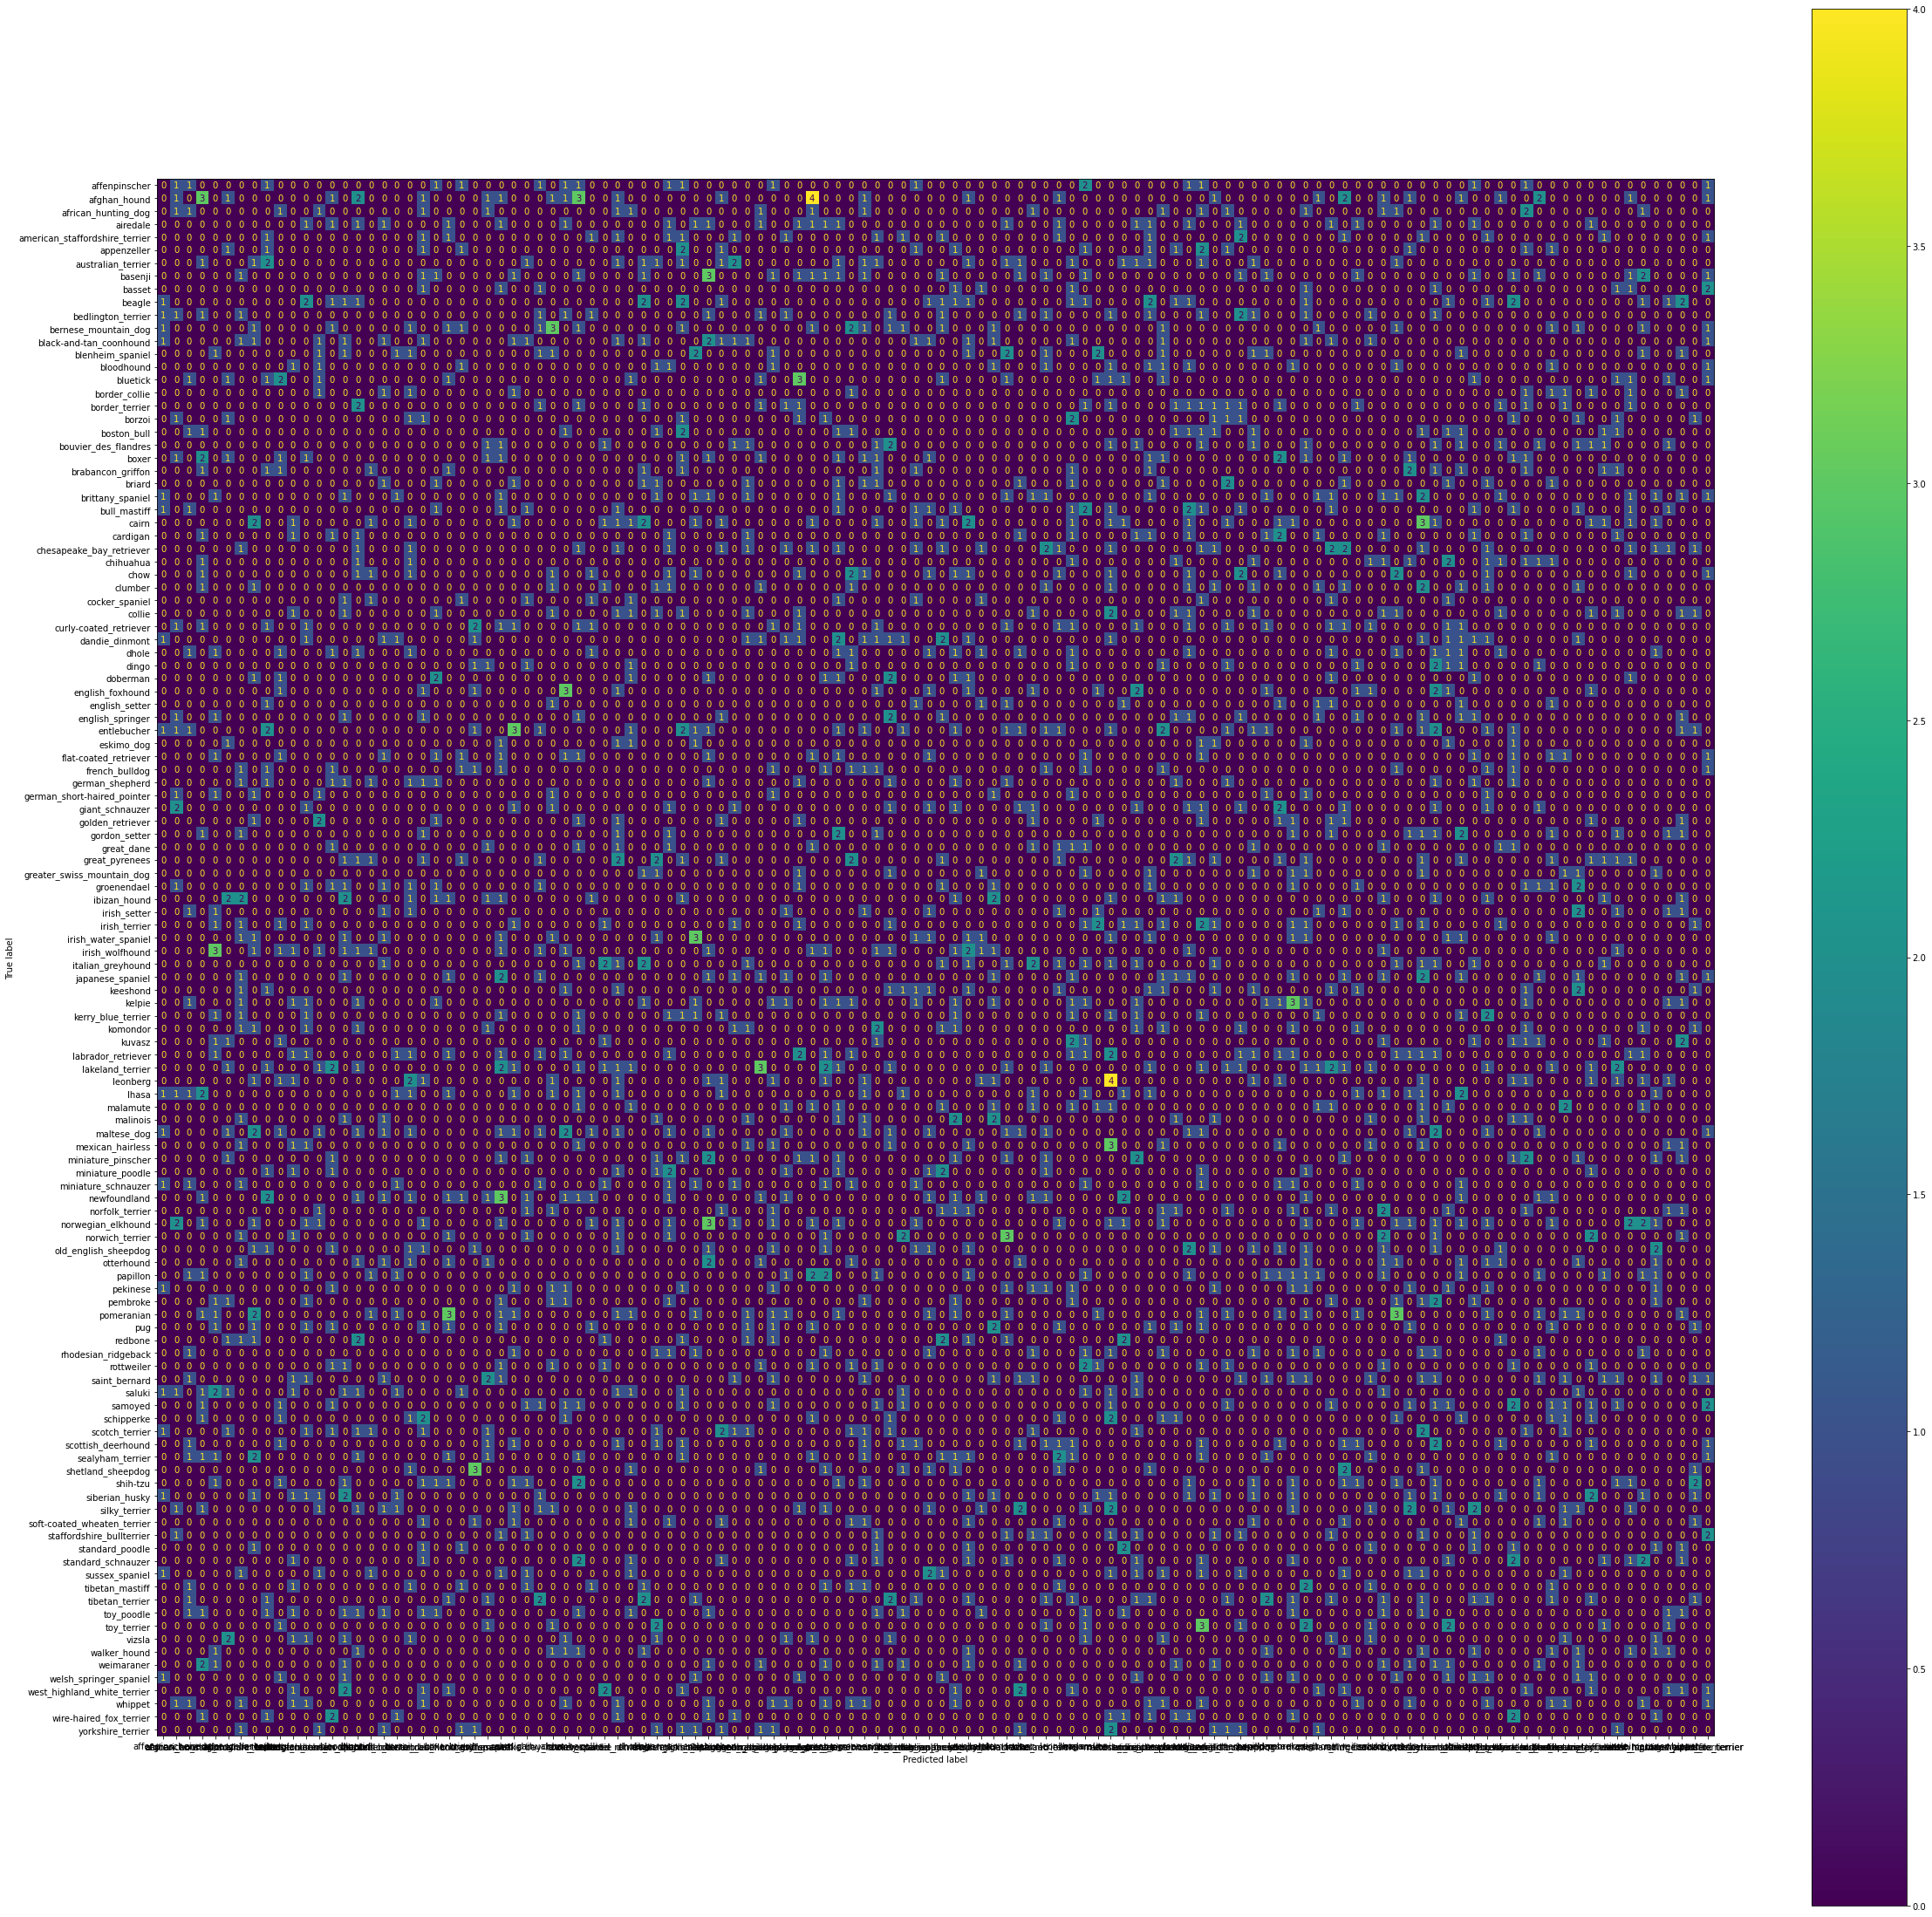

In [ ]:
predictions= clf_str.predict(X_test)
conf_mtx = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(conf_mtx, display_labels=clf_str.classes_)

fig, ax = plt.subplots(figsize=(40, 40))
disp.plot(ax=ax)

In [ ]:
clf_pr = DummyClassifier(strategy='prior', random_state=0)
clf_pr.fit(X_train, y_train)
clf_pr.score(X_test, y_test)

0.008998435054773083

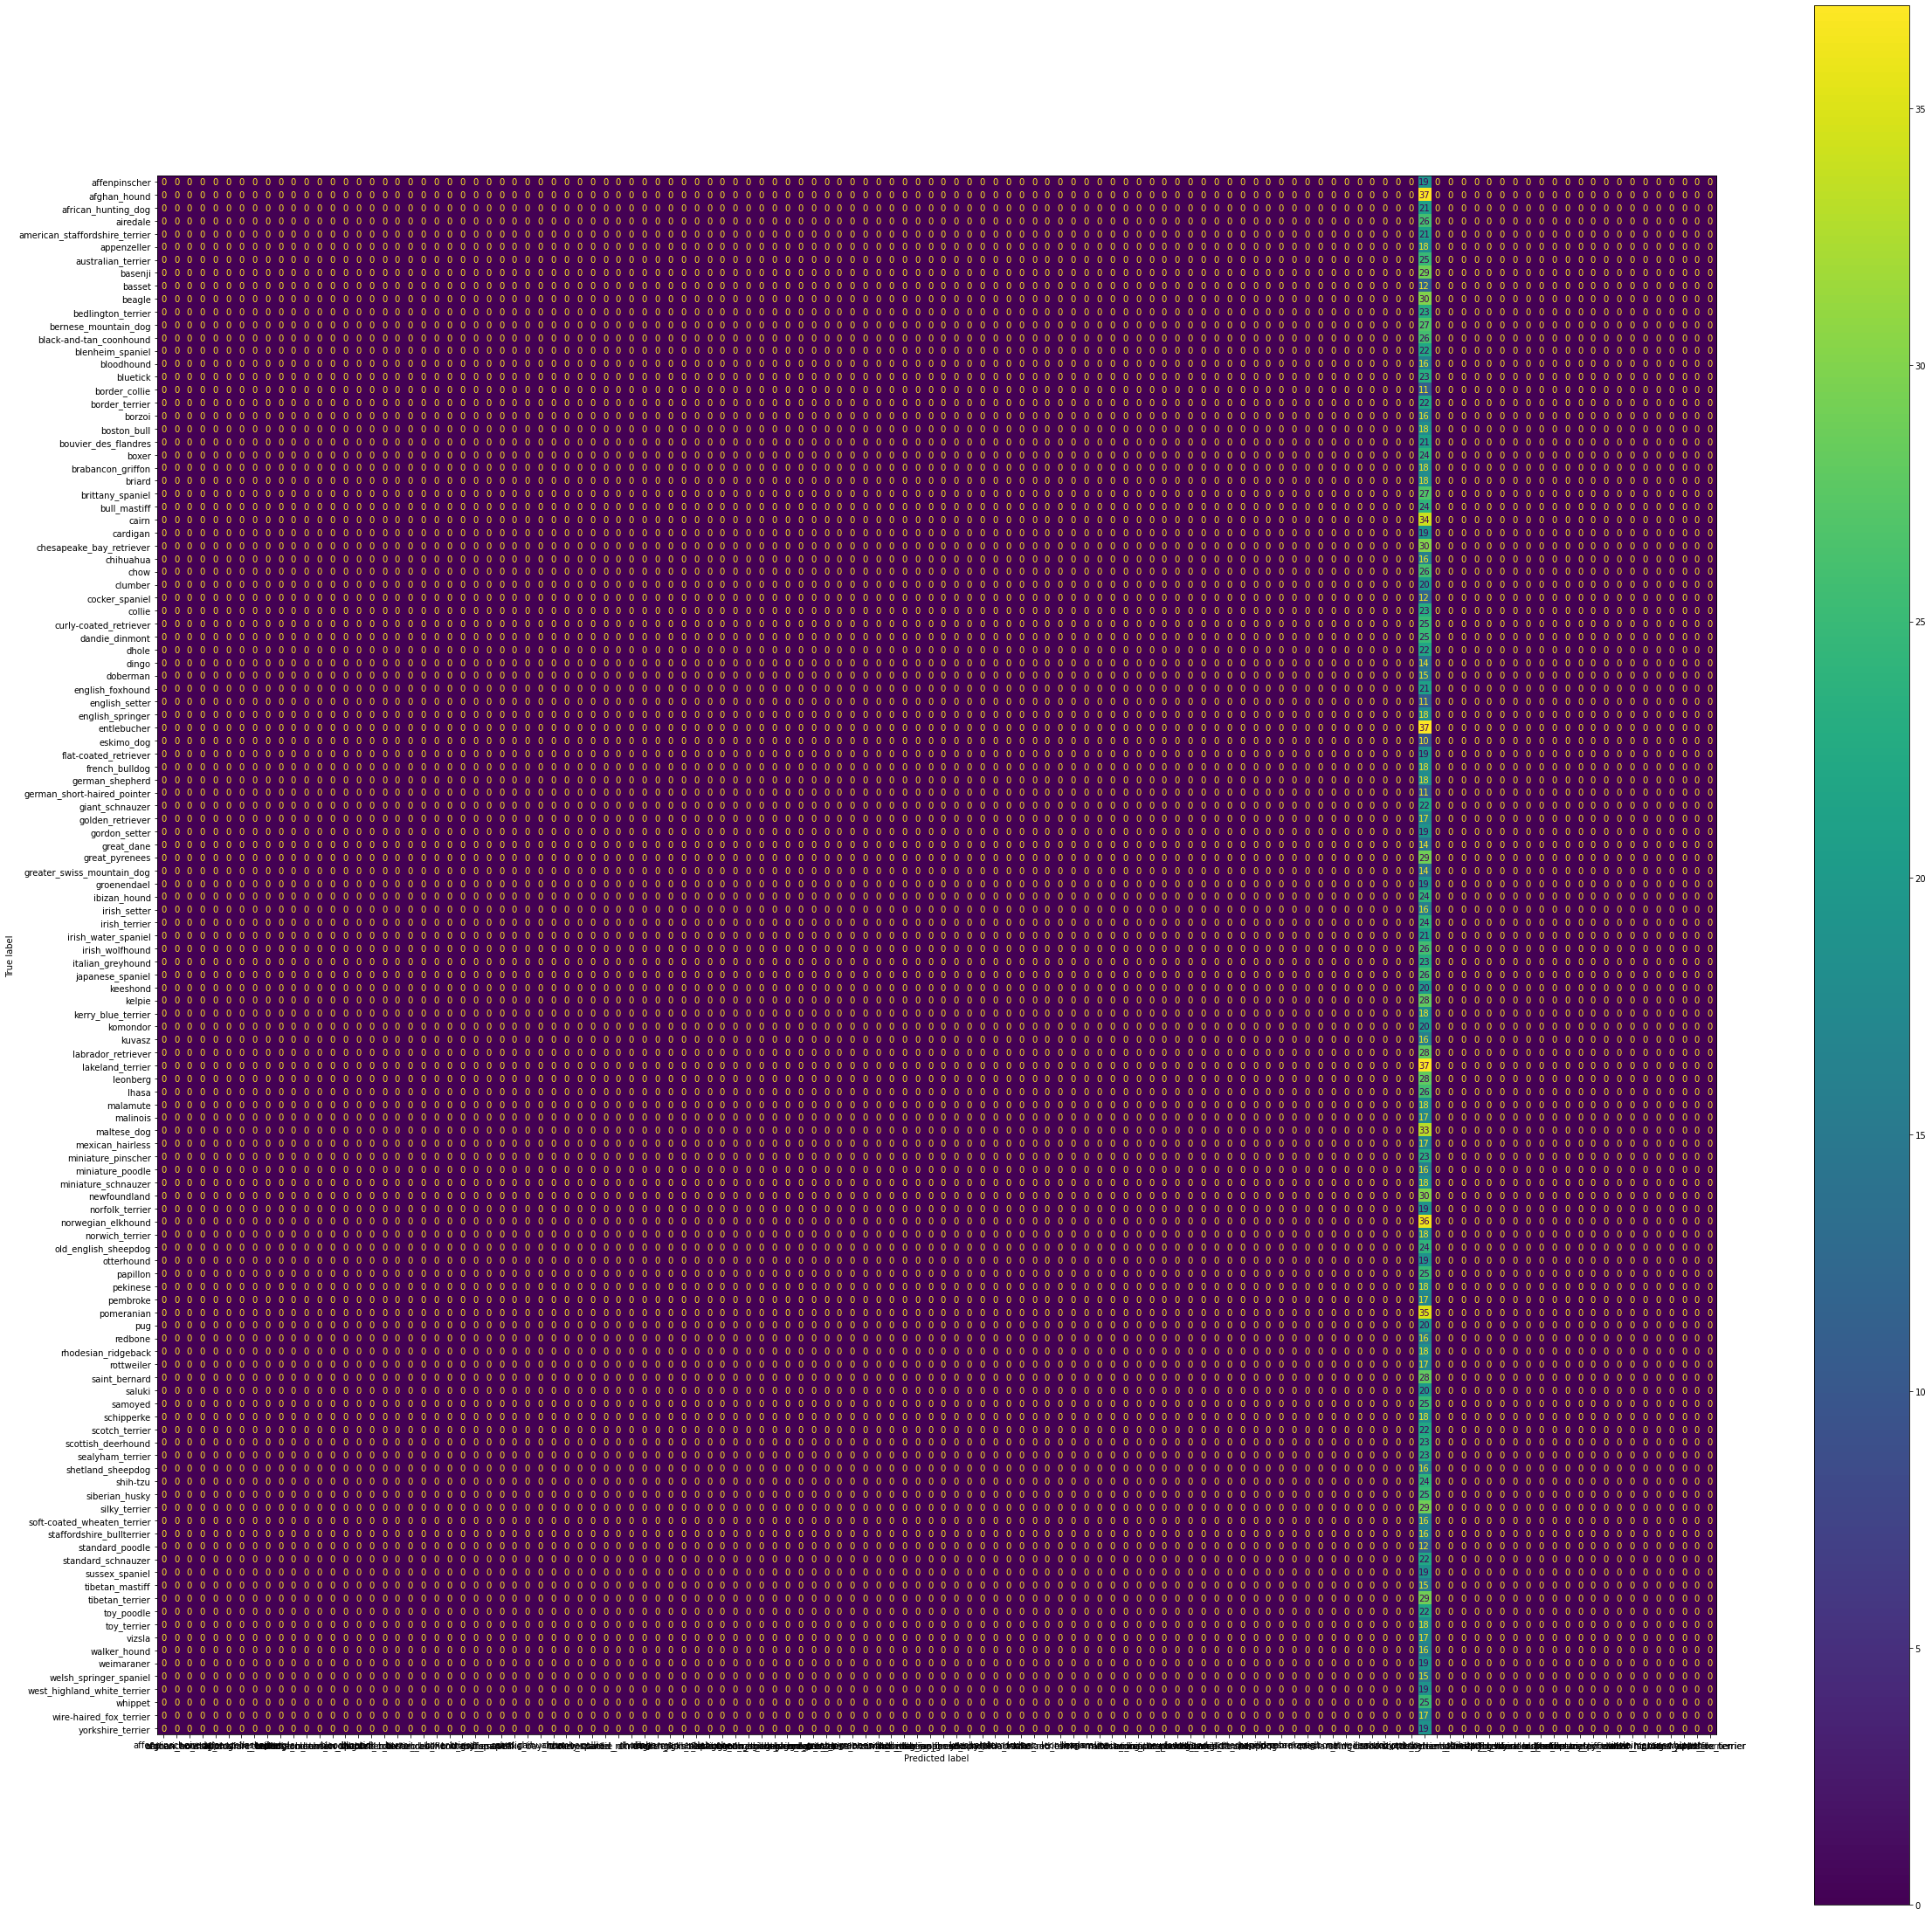

In [ ]:
predictions= clf_pr.predict(X_test)
conf_mtx = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(conf_mtx, display_labels=clf_pr.classes_)

fig, ax = plt.subplots(figsize=(40, 40))
disp.plot(ax=ax)

In [ ]:
clf_un = DummyClassifier(strategy='uniform', random_state=0)
clf_un.fit(X_train, y_train)
clf_un.score(X_test, y_test)

0.007433489827856025

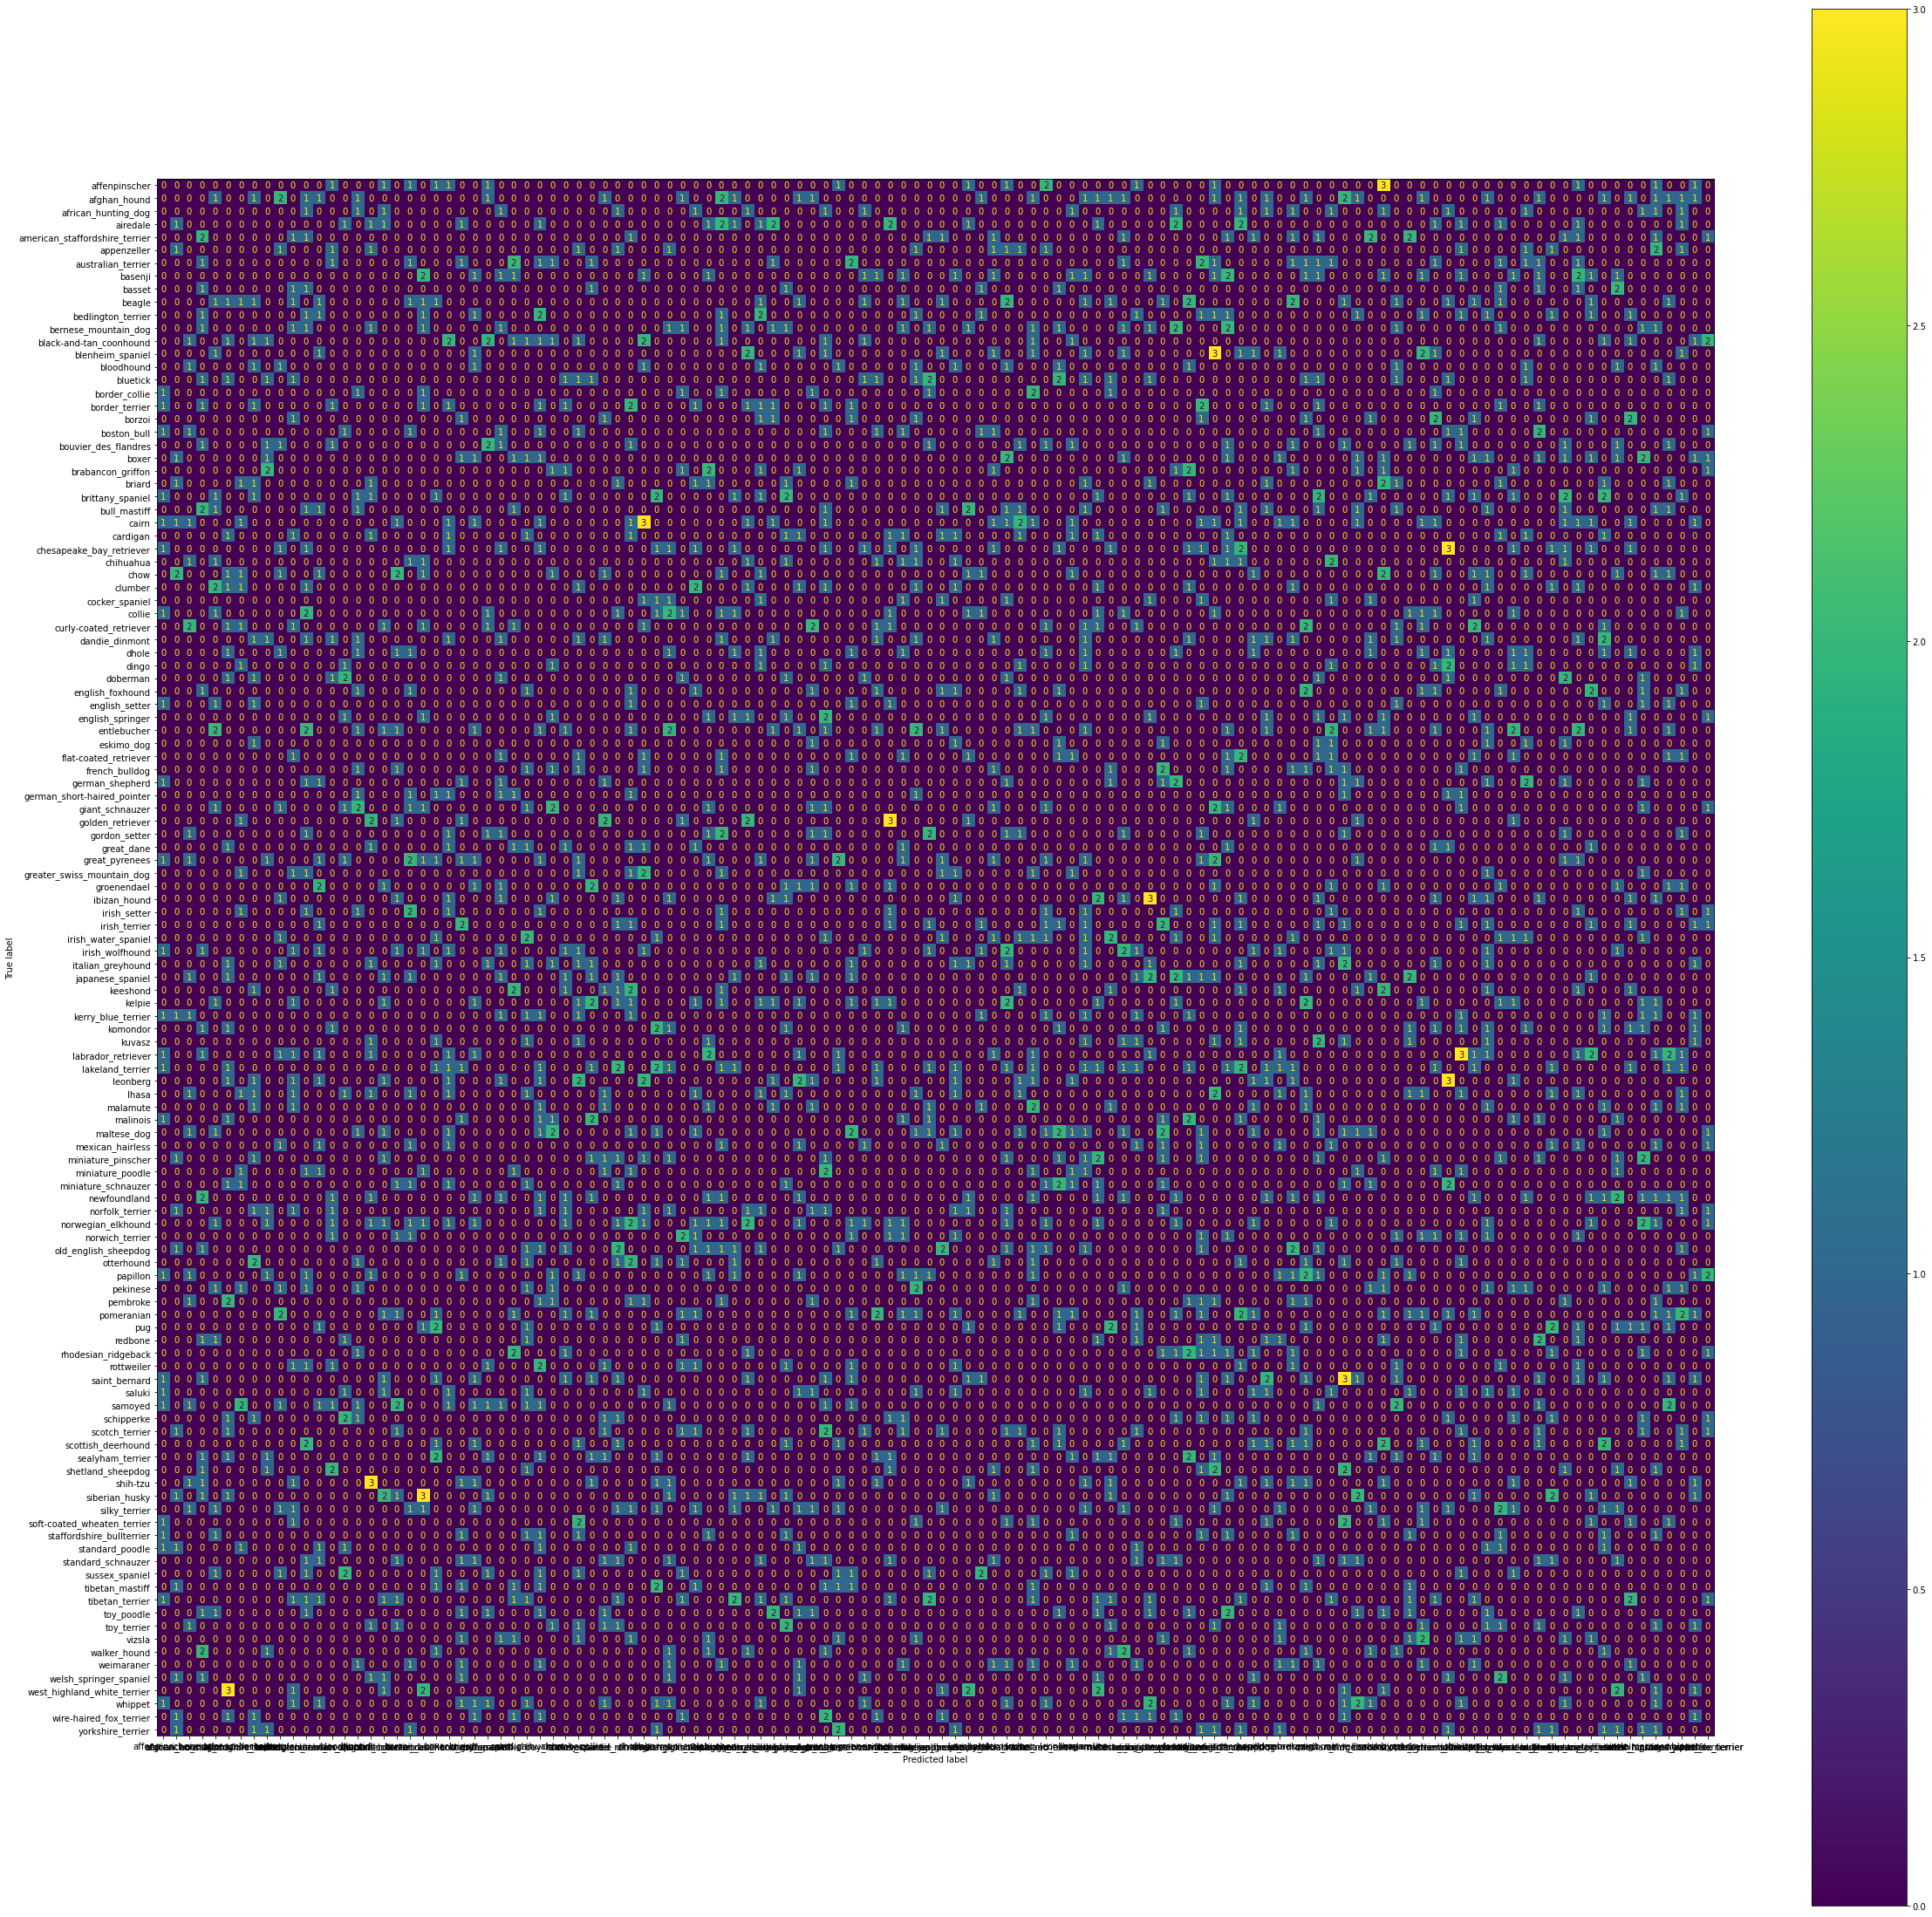

In [ ]:
predictions= clf_un.predict(X_test)
conf_mtx = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(conf_mtx, display_labels=clf_un.classes_)

fig, ax = plt.subplots(figsize=(40, 40))
disp.plot(ax=ax)

In [ ]:
clf_con = DummyClassifier(strategy='constant', random_state=0, constant='chihuahua')
clf_con.fit(X_train, y_train)
clf_con.score(X_test, y_test)

0.006259780907668232

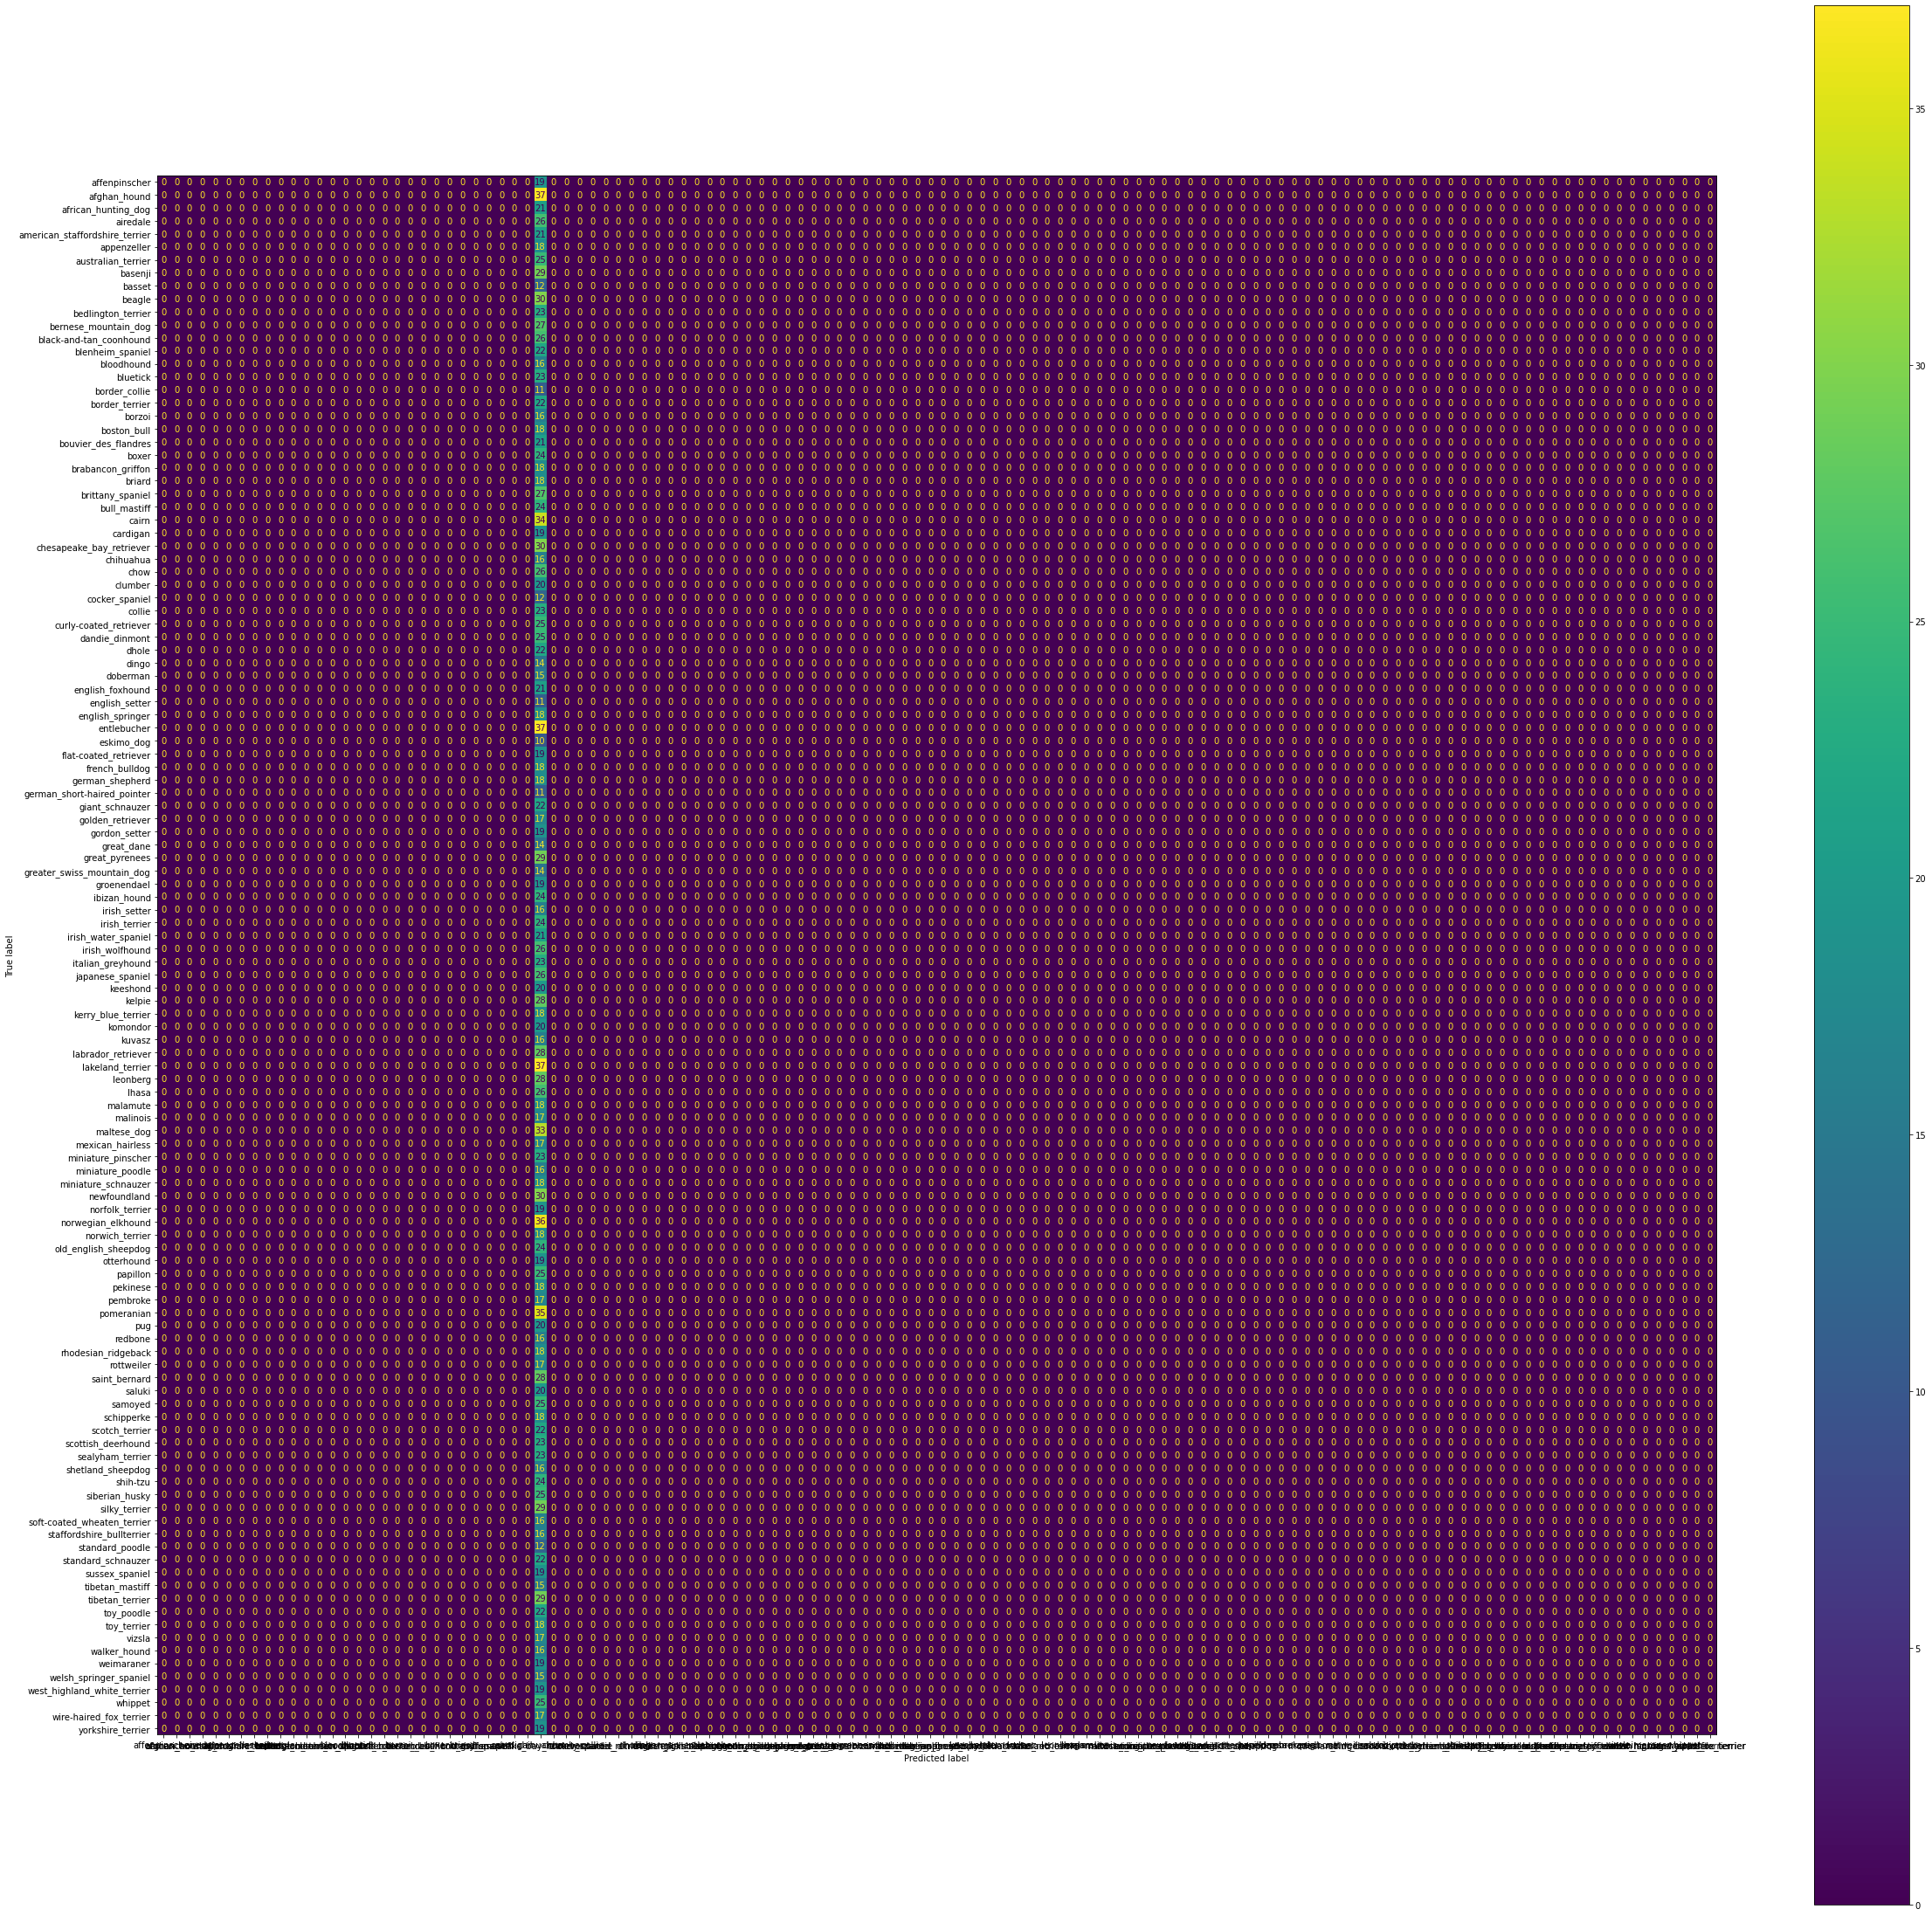

In [ ]:
predictions= clf_con.predict(X_test)
conf_mtx = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(conf_mtx, display_labels=clf_con.classes_)

fig, ax = plt.subplots(figsize=(40, 40))
disp.plot(ax=ax)